# Data Preprocessing
**By: M. Alwi Sukra**

Preprocess transformed data until prepared for machine learning algorithm

#### import useful libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import time
from collections import deque

#### get transformed data

In [2]:
df = pd.read_csv("transformed_data/1592836941.1897974_preprocessed-data.csv", index_col=False)

In [3]:
df.head()

,frame,subject,class_label,rEar_norm,lEar_norm,mar_norm,perclos,microsleep_rate,yawning_rate
0,4484,1,0,0.582719,0.622472,0.216977,0.033683,0.0,0.0
1,4485,1,0,0.576412,0.601768,0.210735,0.033683,0.0,0.0
2,4486,1,0,0.498003,0.554422,0.201034,0.033460,0.0,0.0
3,4487,1,0,0.595975,0.581950,0.208411,0.033237,0.0,0.0
4,4488,1,0,0.549539,0.534910,0.200352,0.033237,0.0,0.0


In [4]:
df_identical = pd.read_csv("transformed_data/1592836941.1897974_preprocessed-data-identical_fps.csv", index_col=False)

In [5]:
df_identical.head()

,frame,subject,class_label,rEar_norm,lEar_norm,mar_norm,perclos,microsleep_rate,yawning_rate
0,4321,1,0,0.535363,0.553641,0.098949,0.030556,0.0,0.0
1,4324,1,0,0.547988,0.562705,0.083339,0.030556,0.0,0.0
2,4327,1,0,0.576507,0.554961,0.112021,0.030556,0.0,0.0
3,4330,1,0,0.555828,0.533281,0.085486,0.030556,0.0,0.0
4,4333,1,0,0.535523,0.520933,0.084005,0.030556,0.0,0.0


## Balancing Data

Balance both original fps and identical fps data so that **for each subject has the same amount of data class 0 and class 1**

#### get fps info

In [6]:
FPS_PATH = "D:/datasets/ngantuk/fps_info.txt"

In [7]:
df_fps = pd.read_csv(FPS_PATH, names=['subject','class_label','fps'], delimiter=';', index_col=False)
df_fps.head()

,subject,class_label,fps
0,1,0,24.91
1,1,1,24.91
2,2,0,30.00
3,2,1,30.00
4,3,0,30.03


Get data **just for the first 2 minutes**

In [8]:
MINUTES_LENGTH = 2

#### normal data

In [9]:
dfs_balanced = []

In [10]:
for subject, df_subject in df.groupby('subject'):
    min_fps = min(df_fps.loc[(df_fps['subject'] == subject)]['fps'].values)
    window_size = int(min_fps * 60 * MINUTES_LENGTH) + 1
    for class_label, df_class in df_subject.groupby('class_label'):
        _df = pd.DataFrame(df_class).reset_index(drop=True)
        dfs_balanced.append(_df.iloc[:window_size])

In [11]:
df_balanced = pd.concat(dfs_balanced)

In [12]:
df_balanced.head()

,frame,subject,class_label,rEar_norm,lEar_norm,mar_norm,perclos,microsleep_rate,yawning_rate
0,4484,1,0,0.582719,0.622472,0.216977,0.033683,0.0,0.0
1,4485,1,0,0.576412,0.601768,0.210735,0.033683,0.0,0.0
2,4486,1,0,0.498003,0.554422,0.201034,0.033460,0.0,0.0
3,4487,1,0,0.595975,0.581950,0.208411,0.033237,0.0,0.0
4,4488,1,0,0.549539,0.534910,0.200352,0.033237,0.0,0.0


In [13]:
df_balanced.groupby('class_label').count()['frame']

class_label
0    28267
1    28267
Name: frame, dtype: int64

#### fps identical data

In [14]:
dfs_identical_balanced = []

In [15]:
FPS = 8
WINDOW_SIZE = int(FPS * 60 * MINUTES_LENGTH) + 1

In [16]:
for subject, df_subject in df_identical.groupby('subject'):
    for class_label, df_class in df_subject.groupby('class_label'):
        _df = pd.DataFrame(df_class).reset_index(drop=True)
        dfs_identical_balanced.append(_df.iloc[:WINDOW_SIZE])

In [17]:
df_identical_balanced = pd.concat(dfs_identical_balanced)

In [18]:
df_identical_balanced.head()

,frame,subject,class_label,rEar_norm,lEar_norm,mar_norm,perclos,microsleep_rate,yawning_rate
0,4321,1,0,0.535363,0.553641,0.098949,0.030556,0.0,0.0
1,4324,1,0,0.547988,0.562705,0.083339,0.030556,0.0,0.0
2,4327,1,0,0.576507,0.554961,0.112021,0.030556,0.0,0.0
3,4330,1,0,0.555828,0.533281,0.085486,0.030556,0.0,0.0
4,4333,1,0,0.535523,0.520933,0.084005,0.030556,0.0,0.0


In [19]:
df_identical_balanced.groupby('class_label').count()['frame']

class_label
0    9610
1    9610
Name: frame, dtype: int64

#### visualize balanced normal data

In [20]:
df_balanced_count = df_balanced.groupby(['subject','class_label']).count().reset_index()

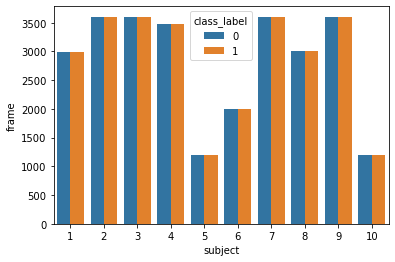

In [21]:
sns.barplot(x='subject',y='frame',data=df_balanced_count,hue='class_label')

#### visualize balanced identical fps data

In [22]:
df_identical_balanced_count = df_identical_balanced.groupby(['subject','class_label']).count().reset_index()

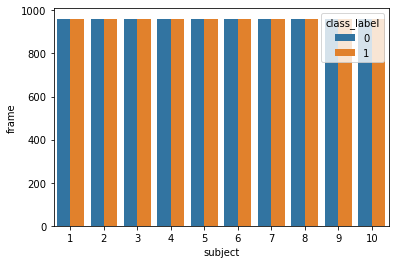

In [23]:
sns.barplot(x='subject',y='frame',data=df_identical_balanced_count,hue='class_label')

## Data Preparation for ANN

#### get data

In [24]:
df_ann = df_balanced[df_balanced.columns[2:]]

#### shuffle data

In [25]:
df_ann = df_ann.sample(frac=1).reset_index(drop=True)

In [26]:
df_ann.head()

,class_label,rEar_norm,lEar_norm,mar_norm,perclos,microsleep_rate,yawning_rate
0,0,0.402614,0.454788,0.046436,0.184695,0.000000,0.0
1,0,0.413968,0.460723,0.163730,0.337116,0.000000,0.0
2,1,0.511867,0.510833,0.152423,0.213519,0.005556,0.0
3,1,0.354118,0.336673,0.050139,0.215185,0.005556,0.0
4,1,0.493931,0.500454,0.041683,0.231556,0.000000,0.0


#### split data

In [27]:
SPLIT_RATIO = 0.8

In [28]:
length = len(df_ann)

In [29]:
split_index = int(0.8*length)

In [30]:
print(f"from a total of {length}, data is split by {SPLIT_RATIO} ratio into {split_index} train data and {length-split_index} test data")

from a total of 56534, data is split by 0.8 ratio into 45227 train data and 11307 test data


In [31]:
train = df_ann.iloc[:split_index].values
test = df_ann.iloc[split_index:].values

#### seperate into x and y

In [32]:
def ann_xy_separator(data, start_idx = 1, end_idx = 8):
    X = []
    y = []
    for row in data:
        X.append(row[start_idx:end_idx])
        y.append(int(row[0]))
    return np.array(X), np.array(y)

In [33]:
%%time
# all feature
X_train_all, y_train_all = ann_xy_separator(data=train)
X_test_all, y_test_all = ann_xy_separator(data=test)
# only base feature
X_train_base, y_train_base = ann_xy_separator(data=train, end_idx=4)
X_test_base, y_test_base = ann_xy_separator(data=test, end_idx=4)
# only aggregate feature
X_train_agg, y_train_agg = ann_xy_separator(data=train, start_idx=4)
X_test_agg, y_test_agg = ann_xy_separator(data=test, start_idx=4)

Wall time: 186 ms


#### data spotlight

In [34]:
print(X_train_all[20],'\n',X_train_base[20],'\n',X_train_agg[20])

[0.60191551 0.598114   0.14043675 0.07656741 0.         0.        ] 
 [0.60191551 0.598114   0.14043675] 
 [0.07656741 0.         0.        ]


In [35]:
print(y_train_all[20],'\n',y_train_base[20],'\n',y_train_agg[20])

0 
 0 
 0


#### save data

In [36]:
prefix='dataset/ann'
# all feature
np.save(file=f'{prefix}-all-X_train', arr=X_train_all)
np.save(file=f'{prefix}-all-y_train', arr=y_train_all)
np.save(file=f'{prefix}-all-X_test', arr=X_test_all)
np.save(file=f'{prefix}-all-y_test', arr=y_test_all)
# only base feature
np.save(file=f'{prefix}-base-X_train', arr=X_train_base)
np.save(file=f'{prefix}-base-y_train', arr=y_train_base)
np.save(file=f'{prefix}-base-X_test', arr=X_test_base)
np.save(file=f'{prefix}-base-y_test', arr=y_test_base)
# only aggregate feature
np.save(file=f'{prefix}-agg-X_train', arr=X_train_agg)
np.save(file=f'{prefix}-agg-y_train', arr=y_train_agg)
np.save(file=f'{prefix}-agg-X_test', arr=X_test_agg)
np.save(file=f'{prefix}-agg-y_test', arr=y_test_agg)

## Data Preparation for LSTM

**Data for LSTM is difference with data for ANN**. ANN required one frame for input at a time, while **LSTM requuired sequential collection of frame** for an input at a time. So first we need to sequentialize the data. the **window of sequentiial data is one minutes**

In [37]:
MINUTES_LENGTH = 1
FPS = 8
SEQ_LEN = int(FPS * 60 * MINUTES_LENGTH)

#### defince function to make a sequencial window

In [38]:
def sequencialize(df, seq_len, label):
    sequential_data = []
    prev = deque(maxlen=seq_len)
    for row in df.values:
        prev.append([data for data in row[3:]])
        if len(prev) == seq_len:
            sequential_data.append([np.array(prev),label])
    return sequential_data

#### get data

In [39]:
seq_datas = []

In [40]:
for subject, df_subject in df_identical_balanced.groupby('subject'):
    for class_label, df_class in df_subject.groupby('class_label'):
        _df = pd.DataFrame(df_class)
        seq_data = sequencialize(_df, SEQ_LEN, class_label)
        seq_datas.extend(seq_data)

#### shuffle data

In [41]:
random.shuffle(seq_datas)

#### split data

In [42]:
SPLIT_RATIO = 0.8

In [43]:
length = len(seq_datas)

In [44]:
split_index = int(0.8*length)

In [45]:
print(f"from a total of {length}, data is split by {SPLIT_RATIO} ratio into {split_index} train data and {length-split_index} test data")

from a total of 9640, data is split by 0.8 ratio into 7712 train data and 1928 test data


In [46]:
train = seq_datas[:split_index]
test = seq_datas[split_index:]

#### seperate into x and y

In [47]:
def lstm_xy_separator(data, start_idx = 0, end_idx = 7):
    X = []
    y = []
    for seq, label in data:
        if(start_idx == 0 and end_idx == 7):
            X.append(seq)
        else:
            X.append([attr[start_idx:end_idx] for attr in seq])
        y.append(int(label))
    return np.array(X), np.array(y)

In [48]:
%%time
# all feature
X_train_all, y_train_all = lstm_xy_separator(data=train)
X_test_all, y_test_all = lstm_xy_separator(data=test)
# only base feature
X_train_base, y_train_base = lstm_xy_separator(data=train, end_idx=3)
X_test_base, y_test_base = lstm_xy_separator(data=test, end_idx=3)
# only aggregate feature
X_train_agg, y_train_agg = lstm_xy_separator(data=train, start_idx=3)
X_test_agg, y_test_agg = lstm_xy_separator(data=test, start_idx=3)

Wall time: 6.74 s


#### data spotlight

In [49]:
print(X_train_all[100][:5],'\n',X_train_base[100][:5],'\n',X_train_agg[100][:5])

[[0.41725241 0.42283555 0.06540904 0.31805556 0.07222222 0.        ]
 [0.47797097 0.51280316 0.09436597 0.31875    0.07222222 0.        ]
 [0.48937226 0.48608813 0.06633803 0.31875    0.07222222 0.        ]
 [0.46685361 0.50968438 0.06592099 0.31875    0.07222222 0.        ]
 [0.48937226 0.47148418 0.06586638 0.31875    0.07222222 0.        ]] 
 [[0.41725241 0.42283555 0.06540904]
 [0.47797097 0.51280316 0.09436597]
 [0.48937226 0.48608813 0.06633803]
 [0.46685361 0.50968438 0.06592099]
 [0.48937226 0.47148418 0.06586638]] 
 [[0.31805556 0.07222222 0.        ]
 [0.31875    0.07222222 0.        ]
 [0.31875    0.07222222 0.        ]
 [0.31875    0.07222222 0.        ]
 [0.31875    0.07222222 0.        ]]


In [50]:
print(y_train_all[100],'\n',y_train_base[100],'\n',y_train_agg[100])

1 
 1 
 1


#### save data

In [51]:
prefix='dataset/lstm'
# all feature
np.save(file=f'{prefix}-all-X_train', arr=X_train_all)
np.save(file=f'{prefix}-all-y_train', arr=y_train_all)
np.save(file=f'{prefix}-all-X_test', arr=X_test_all)
np.save(file=f'{prefix}-all-y_test', arr=y_test_all)
# only base feature
np.save(file=f'{prefix}-base-X_train', arr=X_train_base)
np.save(file=f'{prefix}-base-y_train', arr=y_train_base)
np.save(file=f'{prefix}-base-X_test', arr=X_test_base)
np.save(file=f'{prefix}-base-y_test', arr=y_test_base)
# only aggregate feature
np.save(file=f'{prefix}-agg-X_train', arr=X_train_agg)
np.save(file=f'{prefix}-agg-y_train', arr=y_train_agg)
np.save(file=f'{prefix}-agg-X_test', arr=X_test_agg)
np.save(file=f'{prefix}-agg-y_test', arr=y_test_agg)